##1. IMPORTING FILES

In [ ]:
import pandas as pd

In [ ]:
#read local CSV file and insert header
iris_data = pd.read_csv('iris.data', header=None)
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Pandas can read CSV files hosted online, provided the file's URL is accessible.
# You can pass a URL directly to pd.read_csv()
#read CSV file hosted on a website
db_grades = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/grades.csv')
db_grades.head()

,Last name,"""First name""","""SSN""","""Test1""","""Test2""","""Test3""","""Test4""","""Final""","""Grade"""
0,Alfalfa,"""Aloysius""","""123-45-6789""",40.0,90.0,100.0,83.0,49.0,"""D-"""
1,Alfred,"""University""","""123-12-1234""",41.0,97.0,96.0,97.0,48.0,"""D+"""
2,Gerty,"""Gramma""","""567-89-0123""",41.0,80.0,60.0,40.0,44.0,"""C"""
3,Android,"""Electric""","""087-65-4321""",42.0,23.0,36.0,45.0,47.0,"""B-"""
4,Bumpkin,"""Fred""","""456-78-9012""",43.0,78.0,88.0,77.0,45.0,"""A-"""


In [ ]:
#adding header = column names to local file
iris_data = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# reading JSON online straight from URL
json_data = pd.read_json('https://jsonplaceholder.typicode.com/posts')
json_data.head()

,userId,id,title,body
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...
2,1,3,ea molestias quasi exercitationem repellat qui...,et iusto sed quo iure\nvoluptatem occaecati om...
3,1,4,eum et est occaecati,ullam et saepe reiciendis voluptatem adipisci\...
4,1,5,nesciunt quas odio,repudiandae veniam quaerat sunt sed\nalias aut...


**Linking Google Drive for Data Access:**

In order to access data from Google Drive, we need to link our Google Drive account to Colab. This can be done by executing the following code:



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

You can now access any file in your Google Drive by specifying the path to the file. For example, if you have a CSV file named “iris.data” in the “My Drive” folder, you can import it by executing the following code:

In [ ]:
iris_data = pd.read_csv('/content/drive/My Drive/iris.data')
print(iris_data.head())

**UPLOADING IN GOOGLE COLAB FILES SECTION VS UPLOADING TO GOOGLE DRIVE**

When you upload a file to Google Colab's "Files" section (without using Google Drive), the file is stored temporarily on the virtual machine (VM) that Google Colab provides. This VM is part of the cloud infrastructure, and the storage is ephemeral, meaning the files exist only as long as the session is active.

Here’s what happens in more detail:

Temporary Storage: The file is saved in a temporary local storage system, usually in the /content/ directory on the Colab VM.
Session-Scoped: The file is accessible as long as the Colab session is running. Once you close or restart the session, all uploaded files are lost.
Limited Duration: The VM has a time limit (e.g., 12 hours of activity), and once the session expires or is manually stopped, all files and data stored in the VM are deleted permanently.
If you want to persist files between sessions, you'd need to save them to Google Drive or download them manually to your local machine before the session ends. To link files to your Google Drive, you can use the drive.mount() function from the google.colab module.

Here’s a quick illustration of how to use it:

python
Copy code
from google.colab import drive
drive.mount('/content/drive')
This allows you to store files in your Drive and access them across different sessions.

**2. EXPORTING FILES**

Beaware that CSV files do not stoe metadata such as file type, everything is string. So numeric data like integers and floats are stored as plain text but when you load back this file with panda.

Also you can't have nested structures since CSV store only flat tabular data, you can't have list of dictionaries - for such things JSON or XML are preferred.

XML is a markup language used to store and transport data.
It is tag-based, hierarchical, and self-descriptive, making it ideal for representing structured data.
XML is platform-independent and widely used for data exchange, configuration files, and representing complex data.
Although XML has declined in popularity in favor of JSON for certain use cases (like APIs), it’s still very much in use in industries requiring structured data and validation.

##Comparisson between these 3 similarly named files

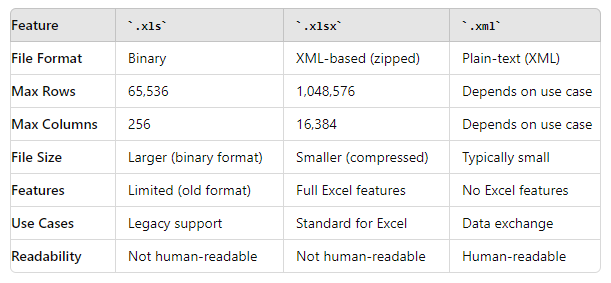

## Exporting files from dataframe

In [ ]:
# Export a dataframe to CSV
df.to_csv('filename.csv', index = False)

#Export a JSON
df.to_json('filename.json')

#Export to Excel file which can include multiple sheets, are widely used:
df.to_excel('filename.xlsx', sheet_name = 'sheet1')

#Export to HTML
df.to_html('filename.html')



depending on how you intend to use this JSON data, you might need it in different structures. That's where customizing the JSON export comes in. Let's walk through this concept using the orient parameter in Pandas.

##Customizing the JSON export

In [ ]:
#How a dataframe syntax (Python looks like)

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}

df = pd.DataFrame(data)

# Exporting to JSON
df.to_json('filename.json', orient='split')

In [ ]:
1. orient='split' will perserve the dataframe format - index, column, data so you could reconstruct it later

In [ ]:
{
    "columns": ["Name", "Age", "City"],
    "index": [0, 1, 2],
    "data": [
        ["Alice", 25, "New York"],
        ["Bob", 30, "Los Angeles"],
        ["Charlie", 35, "Chicago"]
    ]
}




2. orient = 'records'
Structure: Each row in the DataFrame is converted to a dictionary, and all rows are stored in a list. The DataFrame’s index is not included.

Use Case: This is a great format for web APIs where each record might represent an individual entity (e.g., a user, a product).

In [ ]:
[
    {"Name": "Alice", "Age": 25, "City": "New York"},
    {"Name": "Bob", "Age": 30, "City": "Los Angeles"},
    {"Name": "Charlie", "Age": 35, "City": "Chicago"}
]


In [ ]:
orient='index'

Structure: A dictionary of dictionaries. The outer dictionary’s keys are the DataFrame’s index, and the inner dictionaries represent rows.
Use Case: This format is useful when the index is significant, such as when the index represents unique identifiers like user IDs.

In [ ]:
{
    "0": {"Name": "Alice", "Age": 25, "City": "New York"},
    "1": {"Name": "Bob", "Age": 30, "City": "Los Angeles"},
    "2": {"Name": "Charlie", "Age": 35, "City": "Chicago"}
}


In [ ]:
orient='columns'

Structure: A dictionary where each key is a column name, and the values are lists of column data.
Use Case: This structure is intuitive if you are interested in seeing the data grouped by columns, making it useful for certain analytical tasks.

In [ ]:
{
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["New York", "Los Angeles", "Chicago"]
}


In [ ]:
orient='values'

Structure: A list of lists, where each inner list contains the values of a row in the DataFrame.
Use Case: This format strips away both the index and column names, leaving only the raw data. It’s useful for cases where you just need the data without any structure.

In [ ]:
[
    ["Alice", 25, "New York"],
    ["Bob", 30, "Los Angeles"],
    ["Charlie", 35, "Chicago"]
]


## PRACTICE

Challenge: Data Exporting Techniques
1. Export to CSV:

Create a DataFrame with any three columns.
Export it to a CSV file named `simple_export.csv`, ensuring the index is not included.
2. JSON Export:

Use the same DataFrame.
Export it to a JSON file named `simple_export.json` using the default settings.
3. Excel File Creation:

Export the DataFrame to an Excel file `simple_export.xlsx`.

In [ ]:
import pandas as pd
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Kalishte', 'Dubocka']
}

df = pd.DataFrame(data)
df.head()

df.to_csv('simple_export.csv', index = False)
df.to_json('simple_export.json')
df.to_excel('simple_export.xlsx', index = False)

**The default orientation for JSON export in Pandas, if you do not specify the orient parameter, is "columns".**

**Why Does It Appear in a Single Row?**

When you export JSON using Pandas, the default setting for JSON output is minified (compact), meaning all the data is placed on a single line without any extra spaces or line breaks. This is often done to save space and to make data transfer more efficient, but it can make the JSON harder to read for humans.

How to Get Pretty-Printed JSON
If you want to view the JSON in a more readable, multi-line format (also known as "pretty-printed"), you can either:

Set the indent parameter in Pandas: You can modify the JSON export to include indentation, which will add line breaks and indentations to make the JSON more readable.

python
Copy code
df.to_json('simple_export.json', orient='columns', indent=4)
This will output your JSON with each entry on its own line, properly indented.

Format JSON in VS Code: If you've already exported the JSON and it's in a single line, you can format it directly in VS Code:

Open the JSON file.
Right-click anywhere in the file and select "Format Document" (or use the shortcut Shift + Alt + F).

**This is how it works basicaly, sequence in code**

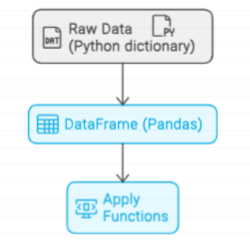

Exercise

In [ ]:
Exercise

In [ ]:
import pandas as pd

   # Create a DataFrame
df = pd.DataFrame({
       'Column1': [1, 2, 3, 4, 5],
       'Column2': ['A', 'B', 'C', 'D', 'E'],
       'Column3': [True, False, True, False, True]
   })

   # Export to CSV
df.to_csv('my_dataframe.csv', index=False)

   # Export to JSON
df.to_json('my_dataframe.json')

## Synthetic Data Generation

In [ ]:
import numpy as np
!pip install faker
from faker import Faker

fake = Faker()

# Generating synthetic names and ages
data = [(fake.name(), np.random.randint(18, 70)) for _ in range(100)]

# Converting to a DataFrame
import pandas as pd
df = pd.DataFrame(data, columns=['Name', 'Age']) # we can name columns as optional argument
print(df.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.3 MB/s eta 0:00:00
                 Name  Age
0          Kelly Beck   25
1        David Harmon   48
2       Brian Hickman   34
3         Robert Cruz   59
4  Katherine Stafford   22


In [ ]:
import numpy as np
from faker import Faker
import pandas as pd

fake = Faker()

# Generating synthetic sales data
sales_data = [(fake.word(), np.random.randint(10, 500), fake.date_this_year(), np.random.randint(18, 70)) for _ in range(500)]
sales_df = pd.DataFrame(sales_data, columns=['Product', 'Sale Amount', 'Date', 'Customer Age'])

# Display the first few rows of the DataFrame
print(sales_df.head())

    Product  Sale Amount        Date  Customer Age
0  thousand          437  2024-05-01            57
1    member           38  2024-01-29            38
2      much          243  2024-06-06            25
3     along          243  2024-06-29            28
4  anything          355  2024-06-12            55
